## ROUTE 3 OUTBOUND 2:30-6 PM PEAK
* Monday - Friday

In [45]:
import geopandas as gpd 
import requests 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import json
from shapely.geometry import LineString
import folium


%matplotlib inline

In [2]:
with open('../data/WeGo.json')as start:
         credentials = json.load(start)

In [3]:
Authorization = credentials['Authorization']

In [4]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/3'

In [5]:
def concat_frames_columns(geo_response, response, date_range, time_range='6am-9am', days='m-f', in_or_out='inbound'):
    """This function pulls in two API requests, puts one in a geodataframe the other in a dataframe and concats desired columns"""
    geo_df = gpd.GeoDataFrame.from_features(geo_response.json()['features'])
    res_df = pd.DataFrame(response.json()['data']['segments'])
    full_df = pd.concat([geo_df, res_df[['countForSegment', 'percent20Secs']]], axis = 1)
    full_df['dates'] = date_range
    full_df['time'] = time_range
    full_df['days_of_week'] = days
    full_df['direction']= in_or_out
    full_df['max_seg_count'] = full_df['countForSegment'].max()
    full_df['proportion_of_segments'] = full_df['countForSegment']/full_df['max_seg_count']
    return full_df

## In School Months - Jan to May

In [6]:
params1a = {
    'direction':'1',
    'startDate':'01-25-2022',
    'endDate': '02-24-2022',
    'excludeDates': '02-18-2022',
    'beginTime': '14:30',
    'endTime': '18:00',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}


params1b = {
    'direction':'1',
    'startDate':'01-25-2022',
    'endDate': '02-24-2022',
    'excludeDates': '02-18-2022',
    'beginTime': '14:30',
    'endTime': '18:00',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [7]:
pm_jantofeb = concat_frames_columns(requests.get(URL, params = params1a, headers = headers), 
                                      requests.get(URL, params = params1b, headers = headers), "1/25/22-2/24/22")
pm_jantofeb

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.83118 36.13237, -86.83094 36.1...",WESWILEF,WESWILEF (stop name not available),WESLEOEN,West End Ave & Leonard Ave Eb,23.816,3.343647,7.122761,63.223,5.061,...,1.424,1.215,201,1.528,1/25/22-2/24/22,6am-9am,m-f,inbound,212,0.948113
1,"LINESTRING (-86.84469 36.12699, -86.84448 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.495,2.745395,8.922213,44.179,4.332,...,1.492,1.205,205,1.742,1/25/22-2/24/22,6am-9am,m-f,inbound,212,0.966981
2,"LINESTRING (-86.85747 36.13943, -86.85748 36.1...",WHIKENSN,White Bridge Pike & Kendall Sb,WHIKNOSN,White Bridge Pike & Knob Dr Sb,23.616,1.969474,11.991019,4.527,2.602,...,1.452,1.203,196,1.544,1/25/22-2/24/22,6am-9am,m-f,inbound,212,0.924528
3,"LINESTRING (-86.81407 36.14374, -86.81388 36.1...",WES31AEM,West End Ave & 31st Ave S Eb,WES28AEM,West End Ave & 28th Ave S Eb,24.297,3.432420,7.078679,24.516,4.786,...,1.899,1.611,200,2.118,1/25/22-2/24/22,6am-9am,m-f,inbound,212,0.943396
4,"LINESTRING (-86.79801 36.15197, -86.79777 36.1...",WES20AEN,West End Ave & 20th Ave S Eb,WES17AEN,West End Ave & 17th Ave S Eb,24.723,4.862521,5.084400,52.406,9.207,...,1.768,1.433,194,1.927,1/25/22-2/24/22,6am-9am,m-f,inbound,212,0.915094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,"LINESTRING (-86.79247 36.15442, -86.79222 36.1...",WES17AEN,West End Ave & 17th Ave S Eb,BRO12AEF,Broadway Ave & 12th Ave Eb,24.692,4.289348,5.756586,60.114,5.645,...,2.091,1.625,198,2.324,1/25/22-2/24/22,6am-9am,m-f,inbound,212,0.933962
467,"LINESTRING (-86.84759 36.12496, -86.84738 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,4.703809,5.283590,19.810,6.047,...,3.474,1.561,209,3.780,1/25/22-2/24/22,6am-9am,m-f,inbound,212,0.985849
468,"LINESTRING (-86.82312 36.13552, -86.82291 36.1...",WESELMEN,West End Ave & Elmington Ave Eb,WES440EM,West End Ave & I-440 Ramp Eb,24.392,2.161750,11.283451,3.933,2.724,...,1.653,0.840,204,1.796,1/25/22-2/24/22,6am-9am,m-f,inbound,212,0.962264
469,"LINESTRING (-86.78462 36.16286, -86.78474 36.1...",8AVUNINN,8th Ave N & Union St Nb,CHA7AEN,Charlotte Ave & 7th Ave N Eb,24.033,9.483298,2.534245,63.508,33.994,...,2.384,1.807,208,2.647,1/25/22-2/24/22,6am-9am,m-f,inbound,212,0.981132


In [36]:
pm_jantofeb = pm_jantofeb[pm_jantofeb['percent20Secs'] > np.quantile(pm_jantofeb['percent20Secs'], .80)]

<AxesSubplot:>

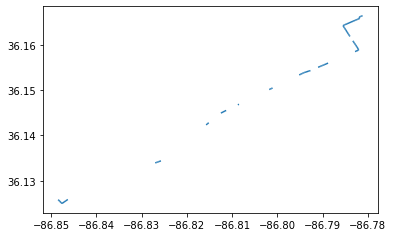

In [10]:
pm_jantofeb[pm_jantofeb['percent20Secs'] > np.quantile(pm_jantofeb['percent20Secs'], .80)].plot()

In [11]:
params2a = {
    'direction':'1',
    'startDate':'02-25-2022',
    'endDate': '03-26-2022',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'beginTime': '14:30',
    'endTime': '18:00',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}


params2b = {
    'direction':'1',
    'startDate':'02-25-2022',
    'endDate': '03-26-2022',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'beginTime': '14:30',
    'endTime': '18:00',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [13]:
pm_febtomar = concat_frames_columns(requests.get(URL, params = params2a, headers = headers), 
                                      requests.get(URL, params = params2b, headers = headers), "2/25/22-3/26/22")
pm_febtomar

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.745478,8.838170,5.691,4.142,...,1.650,1.321,46,1.817,2/25/22-3/26/22,6am-9am,m-f,inbound,151,0.304636
1,GEOMETRYCOLLECTION EMPTY,NaN,NaN,NaN,NaN,23.816,2.612490,9.116207,25.174,2.864,...,1.405,1.157,102,1.495,2/25/22-3/26/22,6am-9am,m-f,inbound,151,0.675497
2,"LINESTRING (-86.84323 36.12786, -86.84300 36.1...",HARWOOEN,Harding Pike & Woodlawn Dr Eb,HARVINEN,Harding Pike & Vine Ct Eb,24.851,1.815826,13.685783,2.301,2.103,...,1.488,1.376,46,1.566,2/25/22-3/26/22,6am-9am,m-f,inbound,151,0.304636
3,"LINESTRING (-86.84469 36.12699, -86.84448 36.1...",HARKENEN,West End Ave & Kenner Ave Eb,HARWOOEN,Harding Pike & Woodlawn Dr Eb,24.495,2.637456,9.287359,9.735,4.419,...,1.355,1.040,147,1.630,2/25/22-3/26/22,6am-9am,m-f,inbound,151,0.973510
4,"LINESTRING (-86.81388 36.14390, -86.81369 36.1...",WES31AEM,West End Ave & 31st Ave S Eb,WES28AEM,West End Ave & 28th Ave S Eb,24.297,3.632469,6.688839,20.876,5.523,...,2.068,1.646,98,2.226,2/25/22-3/26/22,6am-9am,m-f,inbound,151,0.649007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,"LINESTRING (-86.82312 36.13552, -86.82291 36.1...",WESELMEN,West End Ave & Elmington Ave Eb,WES440EM,West End Ave & I-440 Ramp Eb,24.392,2.142747,11.383518,3.791,2.665,...,1.652,1.097,146,1.770,2/25/22-3/26/22,6am-9am,m-f,inbound,151,0.966887
557,"LINESTRING (-86.83047 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,7.410239,3.232824,73.939,23.374,...,1.336,1.199,46,1.514,2/25/22-3/26/22,6am-9am,m-f,inbound,151,0.304636
558,"LINESTRING (-86.83714 36.13047, -86.83690 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.564804,15.274117,2.975,1.903,...,1.280,1.118,46,1.339,2/25/22-3/26/22,6am-9am,m-f,inbound,151,0.304636
559,"LINESTRING (-86.78462 36.16286, -86.78474 36.1...",8AVUNINN,8th Ave N & Union St Nb,CHA7AEN,Charlotte Ave & 7th Ave N Eb,24.033,8.916040,2.695479,50.157,26.113,...,2.365,1.718,151,2.747,2/25/22-3/26/22,6am-9am,m-f,inbound,151,1.000000


In [37]:
pm_febtomar = pm_febtomar[pm_febtomar['percent20Secs'] > np.quantile(pm_febtomar['percent20Secs'], .80)]

<AxesSubplot:>

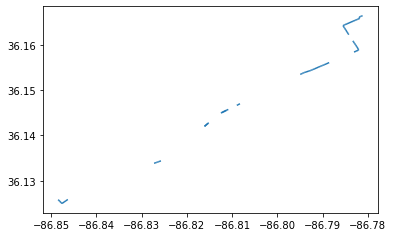

In [16]:
pm_febtomar[pm_febtomar['percent20Secs'] > np.quantile(pm_febtomar['percent20Secs'], .80)].plot()

In [17]:
params3a = {
    'direction':'1',
    'startDate':'03-27-2022',
    'endDate': '04-26-2022',
    'excludeDates': '04-14-2022,04-15-2022',
    'beginTime': '14:30',
    'endTime': '18:00',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}


params3b = {
    'direction':'1',
    'startDate':'03-27-2022',
    'endDate': '04-26-2022',
    'excludeDates': '04-14-2022,04-15-2022',
    'beginTime': '14:30',
    'endTime': '18:00',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [18]:
pm_martoapr = concat_frames_columns(requests.get(URL, params = params3a, headers = headers), 
                                      requests.get(URL, params = params3b, headers = headers), "3/27/22-4/26/22")
pm_martoapr

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.900655,12.787697,22.415,2.134,...,1.392,0.924,139,1.518,3/27/22-4/26/22,6am-9am,m-f,inbound,345,0.402899
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.910911,8.335878,114.995,3.917,...,1.675,1.059,336,1.879,3/27/22-4/26/22,6am-9am,m-f,inbound,345,0.973913
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.532939,15.842118,2.202,1.827,...,1.284,1.157,131,1.358,3/27/22-4/26/22,6am-9am,m-f,inbound,345,0.379710
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.432634,10.216498,5.911,3.955,...,1.544,0.806,194,1.657,3/27/22-4/26/22,6am-9am,m-f,inbound,345,0.562319
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,9.513232,2.582929,92.521,10.253,...,1.958,1.063,332,2.225,3/27/22-4/26/22,6am-9am,m-f,inbound,345,0.962319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.679350,14.734272,24.053,1.887,...,1.107,0.835,143,1.223,3/27/22-4/26/22,6am-9am,m-f,inbound,345,0.414493
1049,"LINESTRING (-86.83047 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,3.583896,6.684346,57.772,6.322,...,1.386,0.734,328,1.473,3/27/22-4/26/22,6am-9am,m-f,inbound,345,0.950725
1050,"LINESTRING (-86.83714 36.13047, -86.83690 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.732702,13.794063,4.241,2.288,...,1.321,1.012,325,1.414,3/27/22-4/26/22,6am-9am,m-f,inbound,345,0.942029
1051,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,3.669130,6.525525,21.351,6.129,...,2.008,0.910,131,2.299,3/27/22-4/26/22,6am-9am,m-f,inbound,345,0.379710


In [38]:
pm_martoapr = pm_martoapr[pm_martoapr['percent20Secs'] > np.quantile(pm_martoapr['percent20Secs'], .80)]

<AxesSubplot:>

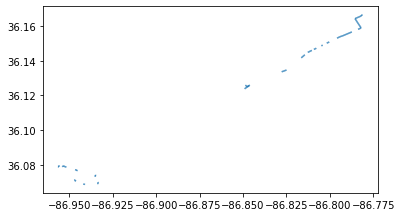

In [20]:
pm_martoapr[pm_martoapr['percent20Secs'] > np.quantile(pm_martoapr['percent20Secs'], .80)].plot()

In [21]:
params4a = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime': '14:30',
    'endTime': '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params4b = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime': '14:30',
    'endTime': '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [22]:
pm_aprtomay = concat_frames_columns(requests.get(URL, params = params4a, headers = headers), 
                                      requests.get(URL, params = params4b, headers = headers), "4/27/22-5/25/22")
pm_aprtomay

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.792064,13.562574,9.338,2.263,...,1.365,0.881,202,1.445,4/27/22-5/25/22,6am-9am,m-f,inbound,410,0.492683
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.568360,9.447663,61.506,3.567,...,1.701,0.988,403,1.835,4/27/22-5/25/22,6am-9am,m-f,inbound,410,0.982927
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.467365,16.550074,2.575,1.720,...,1.230,1.045,200,1.284,4/27/22-5/25/22,6am-9am,m-f,inbound,410,0.487805
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.328872,10.671690,5.408,3.680,...,1.490,0.396,203,1.608,4/27/22-5/25/22,6am-9am,m-f,inbound,410,0.495122
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,9.231376,2.661792,92.928,10.893,...,1.996,0.921,396,2.255,4/27/22-5/25/22,6am-9am,m-f,inbound,410,0.965854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.598430,15.480190,12.403,1.874,...,1.130,0.847,200,1.203,4/27/22-5/25/22,6am-9am,m-f,inbound,410,0.487805
1049,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,3.562416,6.724650,81.857,5.985,...,1.339,1.074,385,1.415,4/27/22-5/25/22,6am-9am,m-f,inbound,410,0.939024
1050,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.687044,14.167384,4.577,2.199,...,1.298,0.869,383,1.384,4/27/22-5/25/22,6am-9am,m-f,inbound,410,0.934146
1051,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,3.403313,7.035204,19.718,4.858,...,1.947,0.721,195,2.252,4/27/22-5/25/22,6am-9am,m-f,inbound,410,0.475610


In [39]:
pm_aprtomay = pm_aprtomay[pm_aprtomay['percent20Secs'] > np.quantile(pm_aprtomay['percent20Secs'], .80)]

<AxesSubplot:>

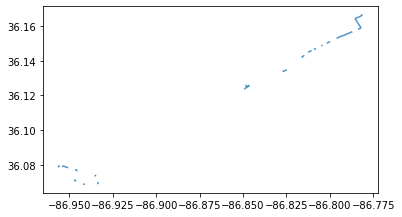

In [25]:
pm_aprtomay[pm_aprtomay['percent20Secs'] > np.quantile(pm_aprtomay['percent20Secs'], .80)].plot()

## Summer Months May-July

In [26]:
params5a = {
    'direction':'1',
    'startDate':'05-26-2022',
    'endDate': '06-25-2022',
    'beginTime': '14:30',
    'endTime': '18:00',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}


params5b = {
    'direction':'1',
    'startDate':'05-26-2022',
    'endDate': '06-25-2022',
    'beginTime': '14:30',
    'endTime': '18:00',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [27]:
pm_maytojun = concat_frames_columns(requests.get(URL, params = params5a, headers = headers), 
                                      requests.get(URL, params = params5b, headers = headers), "5/26/22-6/25/22")
pm_maytojun

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.738101,13.983652,20.249,1.957,...,1.320,0.790,208,1.405,5/26/22-6/25/22,6am-9am,m-f,inbound,429,0.484848
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.224039,10.910330,9.878,3.248,...,1.551,1.272,413,1.686,5/26/22-6/25/22,6am-9am,m-f,inbound,429,0.962704
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.435799,16.913927,2.099,1.648,...,1.250,0.992,209,1.306,5/26/22-6/25/22,6am-9am,m-f,inbound,429,0.487179
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.428198,10.235162,9.833,4.115,...,1.471,1.185,212,1.603,5/26/22-6/25/22,6am-9am,m-f,inbound,429,0.494172
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,9.325545,2.634913,89.019,12.530,...,1.804,0.761,409,2.137,5/26/22-6/25/22,6am-9am,m-f,inbound,429,0.953380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,1.457201,16.980499,7.206,1.729,...,1.127,0.882,209,1.189,5/26/22-6/25/22,6am-9am,m-f,inbound,429,0.487179
1048,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,2.174262,11.017991,49.511,2.844,...,1.318,0.859,401,1.411,5/26/22-6/25/22,6am-9am,m-f,inbound,429,0.934732
1049,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.621100,14.743693,4.137,1.992,...,1.288,0.861,401,1.373,5/26/22-6/25/22,6am-9am,m-f,inbound,429,0.934732
1050,"LINESTRING (-86.84734 36.12513, -86.84714 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,3.961602,6.043767,22.035,6.607,...,1.907,1.252,206,2.195,5/26/22-6/25/22,6am-9am,m-f,inbound,429,0.480186


In [40]:
pm_maytojun = pm_maytojun[pm_maytojun['percent20Secs'] > np.quantile(pm_maytojun['percent20Secs'], .80)]

<AxesSubplot:>

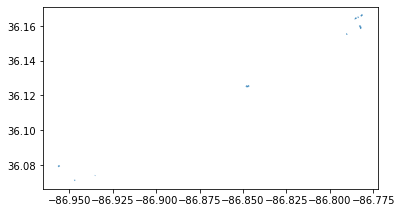

In [41]:
pm_maytojun[pm_maytojun['percent20Secs'] > np.quantile(pm_maytojun['percent20Secs'], .80)].plot()

In [30]:
params6a = {
    'direction':'1',
    'startDate':'06-26-2022',
    'endDate': '07-26-2022',
    'excludeDate': '07/04/2022',
    'beginTime': '14:30',
    'endTime': '18:00',
    'daysOfWeek': '1,2,3,4,5',
    'format':'geojson',
    'resolution':'hiRes',
}


params6b = {
    'direction':'1',
    'startDate':'06-26-2022',
    'endDate': '07-26-2022',
    'excludeDate': '07/04/2022',
    'beginTime': '14:30',
    'endTime': '18:00',
    'daysOfWeek': '1,2,3,4,5',
    #'format':'geojson',
    'resolution':'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [31]:
pm_juntojul = concat_frames_columns(requests.get(URL, params = params6a, headers = headers), 
                                      requests.get(URL, params = params6b, headers = headers), "6/26/22-7/26/22")
pm_juntojul

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.92385 36.07396, -86.92358 36.0...",H70HICEN,Hwy 70 S & Hicks Ln Eb,H70OLDEF,Hwy 70 S & Old Hickory Blvd Eb,24.305,1.658471,14.655065,4.331,2.019,...,1.335,0.640,208,1.424,6/26/22-7/26/22,6am-9am,m-f,inbound,431,0.482599
1,"LINESTRING (-86.81722 36.14104, -86.81704 36.1...",WESACKEN,West End Ave & Acklen Park Dr Eb,WES31AEM,West End Ave & 31st Ave S Eb,24.265,2.210164,10.978823,16.964,3.183,...,1.544,1.032,403,1.669,6/26/22-7/26/22,6am-9am,m-f,inbound,431,0.935035
2,"LINESTRING (-86.93141 36.07377, -86.93114 36.0...",H70COLEM,Hwy 70 S & Colice Jeanne Rd Eb,H70HICEN,Hwy 70 S & Hicks Ln Eb,24.285,1.448844,16.761639,2.547,1.647,...,1.251,1.095,205,1.302,6/26/22-7/26/22,6am-9am,m-f,inbound,431,0.475638
3,"LINESTRING (-86.85175 36.12782, -86.85153 36.1...",WHIPOSSN,White Bridge Pike & Post Rd Sb,HARKENEN,West End Ave & Kenner Ave Eb,24.853,2.596514,9.571680,13.001,4.358,...,1.577,1.259,212,1.716,6/26/22-7/26/22,6am-9am,m-f,inbound,431,0.491879
4,"LINESTRING (-86.82550 36.13446, -86.82525 36.1...",WESLEOEN,West End Ave & Leonard Ave Eb,WESELMEN,West End Ave & Elmington Ave Eb,24.572,7.405567,3.318044,93.086,8.105,...,1.661,0.857,404,1.910,6/26/22-7/26/22,6am-9am,m-f,inbound,431,0.937355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"LINESTRING (-86.87775 36.09626, -86.87751 36.0...",H70PEREN,Hwy 70 S & Percy Warner Blvd Eb,HARHAREN,Harding Pike & Harding Pl Eb,24.744,3.638657,6.800311,408.140,1.742,...,1.135,0.958,207,1.190,6/26/22-7/26/22,6am-9am,m-f,inbound,431,0.480278
1048,"LINESTRING (-86.83046 36.13264, -86.83022 36.1...",WESWILEN,West End & Wilson Blvd,WESLEOEN,West End Ave & Leonard Ave Eb,23.956,1.802017,13.293992,23.499,2.120,...,1.300,1.119,401,1.377,6/26/22-7/26/22,6am-9am,m-f,inbound,431,0.930394
1049,"LINESTRING (-86.83714 36.13047, -86.83689 36.1...",HARVINEN,Harding Pike & Vine Ct Eb,WESWILEN,West End & Wilson Blvd,23.901,1.583827,15.090663,3.486,1.912,...,1.268,1.033,400,1.339,6/26/22-7/26/22,6am-9am,m-f,inbound,431,0.928074
1050,"LINESTRING (-86.85794 36.14930, -86.85794 36.1...",WHICHASF,White Bridge Pike & Charlotte Shone,WHICORSF,White Bridge Pike & Corbett Ln Sb,24.651,3.225000,7.643721,13.187,5.629,...,1.517,0.889,175,1.760,6/26/22-7/26/22,6am-9am,m-f,inbound,431,0.406032


In [42]:
pm_juntojul = pm_juntojul[pm_juntojul['percent20Secs'] > np.quantile(pm_juntojul['percent20Secs'], .80)]
pm_juntojul

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
17,"LINESTRING (-86.78377 36.15811, -86.78354 36.1...",BRO10AEN,Broadway & 10th Ave Eb,8ABRONM,8th Ave S & Broadway Ave Nb,23.683,2.966790,7.982702,25.615,4.292,...,1.800,1.365,424,1.982,6/26/22-7/26/22,6am-9am,m-f,inbound,431,0.983759
21,"LINESTRING (-86.78354 36.15821, -86.78330 36.1...",BRO10AEN,Broadway & 10th Ave Eb,8ABRONM,8th Ave S & Broadway Ave Nb,23.683,3.454711,6.855277,69.649,5.165,...,1.909,1.365,426,2.101,6/26/22-7/26/22,6am-9am,m-f,inbound,431,0.988399
88,"LINESTRING (-86.94605 36.07704, -86.94580 36.0...",STAPLES,Hwy 70 S & Staples Park-N-Ride,HWYSAWEN,Hwy 70 S & Sawyer Brown Rd Eb,23.260,4.836159,4.809602,32.399,10.305,...,2.123,1.669,182,2.360,6/26/22-7/26/22,6am-9am,m-f,inbound,431,0.422274
90,"LINESTRING (-86.80465 36.14873, -86.80441 36.1...",WES23AEN,West End Ave & 23rd Ave S Eb,WES21AEN,West End Ave & 21st Ave S Eb,24.927,12.860165,1.938311,184.645,29.694,...,1.839,1.482,423,2.120,6/26/22-7/26/22,6am-9am,m-f,inbound,431,0.981439
93,"LINESTRING (-86.81180 36.14528, -86.81157 36.1...",WES31AEM,West End Ave & 31st Ave S Eb,WES28AEM,West End Ave & 28th Ave S Eb,24.277,6.138002,3.955196,197.686,11.578,...,1.948,1.122,427,2.227,6/26/22-7/26/22,6am-9am,m-f,inbound,431,0.990719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,"LINESTRING (-86.84714 36.12527, -86.84694 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,3.958030,6.049221,40.810,5.647,...,1.919,0.968,200,2.109,6/26/22-7/26/22,6am-9am,m-f,inbound,431,0.464037
1034,"LINESTRING (-86.84754 36.12498, -86.84734 36.1...",HARWODEN,Harding Pike & Woodmont Blvd,HARKENEN,West End Ave & Kenner Ave Eb,23.943,3.681780,6.503104,41.861,6.178,...,1.827,0.968,200,2.112,6/26/22-7/26/22,6am-9am,m-f,inbound,431,0.464037
1043,"LINESTRING (-86.79247 36.15442, -86.79222 36.1...",WES17AEN,West End Ave & 17th Ave S Eb,BRO12AEF,Broadway Ave & 12th Ave Eb,24.692,3.429171,7.200574,35.593,4.991,...,1.862,1.495,427,2.114,6/26/22-7/26/22,6am-9am,m-f,inbound,431,0.990719
1046,"LINESTRING (-86.95611 36.07930, -86.95632 36.0...",COLDAVPR,Coley Davis Rd Shelter Park-N-Ride,H70COLEF,Hwy 70 S & Coley Davis Rd Eb,24.564,4.793793,5.124126,19.874,8.394,...,2.890,0.659,169,3.487,6/26/22-7/26/22,6am-9am,m-f,inbound,431,0.392111


<AxesSubplot:>

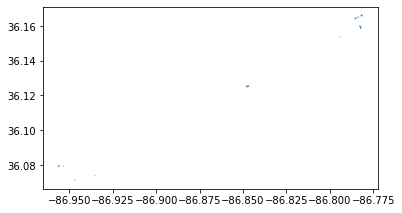

In [43]:
pm_juntojul[pm_juntojul['percent20Secs'] > np.quantile(pm_juntojul['percent20Secs'], .80)].plot()

In [47]:
r3_pmpeak_inschool = pd.concat([pm_jantofeb, pm_febtomar, pm_martoapr, pm_aprtomay], keys = ['pm_jantofeb', 'pm_febtomar', 'pm_martoapr', 'pm_aprtomay'])
r3_pmpeak_inschool_gj = r3_pmpeak_inschool['geometry'].to_json()

r3_pmpeak_summer = pd.concat([pm_maytojun, pm_juntojul])
r3_pmpeak_summer_gj = r3_pmpeak_summer['geometry'].to_json()

mapdawg = folium.Map(location = [36.19, -86.7775], zoom_start = 12)


In [50]:
style1 = {'color' : 'red', 'weight' : 6}
style2 = {'color' : 'yellow', 'weight' : 3}
folium.GeoJson(r3_pmpeak_inschool_gj, style_function = lambda x:style1).add_to(mapdawg)
folium.GeoJson(r3_pmpeak_summer_gj, style_function = lambda x:style2).add_to(mapdawg)
mapdawg